In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Analysis for India

In [ ]:
df_India=pd.read_csv('Dataset/India_Final.csv')


In [ ]:
# Checking rows and columns in the dataframe. 

df_India.shape

(26250, 22)

In [ ]:
#Checking for null values

df_India.isnull().sum()

language          0
Moviename         0
isAdult           0
Year              0
runtimeMinutes    0
genres            0
averageRating     0
numVotes          0
Actors            0
Actress           0
Director          0
Actresss          0
Rating            0
type              0
dtype: int64

In [ ]:
# Descriptive summary of the dataframe, including the number of non-null values in each columns. 

df_India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26250 entries, 0 to 26249
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       26250 non-null  int64  
 1   Unnamed: 0.1     26250 non-null  int64  
 2   tconst           26250 non-null  object 
 3   ordering         26250 non-null  int64  
 4   title            26250 non-null  object 
 5   region           26250 non-null  object 
 6   language         26250 non-null  object 
 7   isOriginalTitle  26250 non-null  int64  
 8   titleType        26250 non-null  object 
 9   primaryTitle     26250 non-null  object 
 10  originalTitle    26250 non-null  object 
 11  isAdult          26250 non-null  int64  
 12  startYear        26250 non-null  int64  
 13  runtimeMinutes   26250 non-null  int64  
 14  genres           26250 non-null  object 
 15  averageRating    26250 non-null  float64
 16  numVotes         26250 non-null  int64  
 17  directors   

In [ ]:
# Check the amount of duplicated data in the dataset

sum(df_India.duplicated())

0

In [ ]:
#Droping the columns that are not included in analysis

df_India=df_India.drop(['Unnamed: 0', 'Unnamed: 0.1', 'tconst', 'ordering', 'title','region', 
       'isOriginalTitle','titleType','directors', 'writers', 'primaryTitle',],axis=1)

In [ ]:
df_India.columns=['language', 'Moviename', 'isAdult','Year', 'runtimeMinutes',            #Year represents movie release year
       'genres', 'averageRating', 'numVotes', 'Actors',
       'Actress', 'Director']

In [ ]:
#Changing the language code to language

df_India.language=df_India.language.replace({'hi':'Hindi','en': 'English','ml':'Malayalam','ta':'Tamil','te':'Telgu',
                          'ur':'Urdu','bn':'Bengali','kn':'Kannada','mr':'Marathi','gu':'Gujarati','pa':'Punjabi'})

In [ ]:
df_India['Actors']=df_India['Actors'].str.split("[").str.get(1)
df_India['Actors']=df_India['Actors'].str.split("]").str.get(0)
df_India['Actors']=df_India['Actors'].str.replace('"','')
df_India['Actors']=df_India['Actors'].str.replace("'",'')

df_India['Director']=df_India['Director'].str.split("[").str.get(1)
df_India['Director']=df_India['Director'].str.split("]").str.get(0)
df_India['Director']=df_India['Director'].str.replace('"','')
df_India['Director']=df_India['Director'].str.replace("'",'')

df_India['Actress']=df_India['Actress'].str.split("[").str.get(1)
df_India['Actress']=df_India['Actress'].str.split("]").str.get(0)
df_India['Actresss']=df_India['Actress'].str.replace('"','')
df_India['Actress']=df_India['Actress'].str.replace("'",'')

Scatter Plots

In [ ]:
runtime = df_India['runtimeMinutes'].tolist()
rating = df_India['averageRating'].tolist()
year=df_India['Year'].tolist()

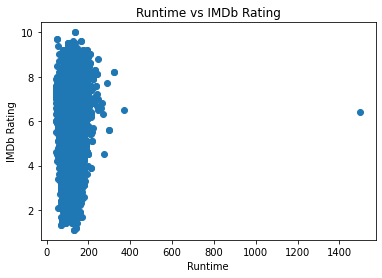

In [ ]:
plt.scatter(runtime,rating)
plt.title('Runtime vs IMDb Rating')
plt.xlabel('Runtime')
plt.ylabel('IMDb Rating')
plt.show()

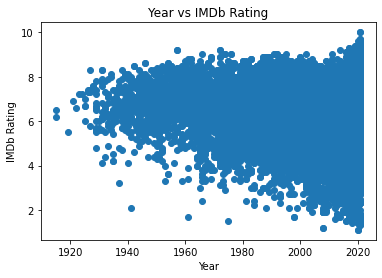

In [ ]:
plt.scatter(year,rating)
plt.title('Year vs IMDb Rating')
plt.xlabel('Year')
plt.ylabel('IMDb Rating')
plt.show()

1.Higher runtimes tend to have higher IMDb ratings, but for the vast majority of runtime, the IMDb ratings are spread from about 1 to 10, so it can’t be predicted using the feature by themselves.

2.For the Year vs IMDb rating scatter plot, the older years tend to have higher IMDb ratings, but the spread of IMDb ratings increases for more recent years



Correlation between the attributes of the given dataset

,isAdult,Year,runtimeMinutes,averageRating,numVotes
isAdult,1.000000,0.001959,-0.006234,-0.002019,-0.005434
Year,0.001959,1.000000,-0.033964,-0.160763,-0.017246
runtimeMinutes,-0.006234,-0.033964,1.000000,0.227697,0.028016
averageRating,-0.002019,-0.160763,0.227697,1.000000,0.277065
numVotes,-0.005434,-0.017246,0.028016,0.277065,1.000000


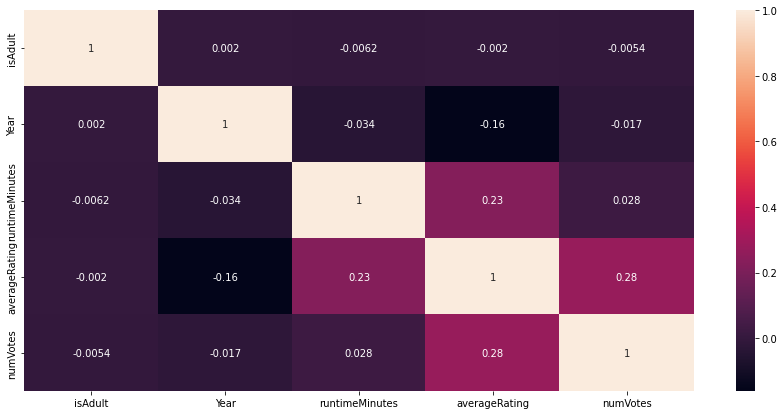

In [ ]:
plt.figure(figsize=(15,7))
corr_matrix=df_India.corr()
sns.heatmap(corr_matrix,annot=True)
corr_matrix

From above correlation matrix we find that there is a correlation between
average rating-runtime,number of votes-runtime and number of votes-average rating

Finding top10 genre combination based on rating,runtime of movies

In [ ]:
df_India.groupby('genres')[['averageRating']].mean().sort_values(by='averageRating',ascending=False).head(10)

,averageRating
genres,
"Biography,History",9.26
"Animation,Drama,War",8.50
"Animation,Mystery",8.40
"Drama,Mystery,War",8.30
"Drama,Fantasy,War",8.20
"Adventure,Crime,Family",8.10
"Biography,Documentary,Musical",8.10
"Adult,Thriller",8.10
"Comedy,Crime,Sport",8.10


Combination of Biography and history has the highest average rating among all combination

In [ ]:
df_India.groupby('genres')[['runtimeMinutes']].mean().sort_values(by='runtimeMinutes',ascending=False).head(10)

,runtimeMinutes
genres,
"Adventure,History,Romance",287.0
"Sci-Fi,Western",245.0
"Drama,Musical,Sport",224.0
"History,War",185.0
"Action,Musical,War",184.0
"History,Musical,Romance",175.0
"Biography,Crime,Thriller",171.0
"Musical,Romance,Thriller",168.0
"Action,Music",168.0


Combination of Adventure,History,Romance has the highest average runtime among all combination

Top 10 directors based on movie ratings directed by them

In [ ]:
df_India.groupby('Director')[['averageRating']].mean().sort_values(by='averageRating',ascending=False).head(10)

,averageRating
Director,
Kayyam Upendra Kumar Nandhan,10.0
Naveen Deshaboina,9.6
Kittu,9.5
Revanth Korukonda,9.5
Sam Bhattacharjee,9.5
Mathilde Damoisel,9.4
Basheer Pulari,9.4
Prasun Chatterjee,9.4
Hemanth Srinivas,9.4


**Kayyam Upendra Kumar Nandhan** has the highest average rating among all directors

Top10 movies based on rating

In [ ]:
df_India.groupby('Moviename')[['averageRating']].mean().sort_values(by='averageRating',ascending=False).head(10)

,averageRating
Moviename,
Miles of Love,10.0
Rickshawala,9.7
Jai Bhim,9.6
Lata Bhagwan Kare,9.6
Barun Rai and the House on the Cliff,9.5
Methagu,9.5
Natyam,9.5
Cabin,9.4
Crazy Uncles,9.4


**Miles of Love** has the highest average rating among all movies

Top10 movies based on runtime

In [ ]:
df_India.groupby('Moviename')[['runtimeMinutes']].mean().sort_values(by='runtimeMinutes',ascending=False).head(10)

,runtimeMinutes
Moviename,
****,1500.0
DAU. Degeneratsiya,369.0
Gangs of Wasseypur,321.0
Athidhi,300.0
Potop,287.0
Cobra nero,272.0
Darkest Africa,269.0
The Greatest Story Ever Told,260.0
Janwar,247.0


Top10 actors based on movie rating

In [ ]:
df_India.groupby('Actors')[['averageRating']].mean().sort_values(by='averageRating',ascending=False).head(10)

,averageRating
Actors,
"Ramya Pasupileti, Kaushik Reddy, Medishetti Abhinav, Ravi Siva Teja",10.0
Avinash Dwivedi,9.7
"Aarumugam, Suriya",9.6
"Bhagwan Kare, Sunil Kare, Ajay Shinde",9.6
"Sid Makkar, George Dawson, Priyanshu Chatterjee",9.5
"Chandrasekar, Eshwar Basha, Kutti Mani",9.5
"Subhalekha Sudhakar, Kamal Kamaraju",9.5
"Kranti Reddy, Krishna Murali Posani",9.4
"Aravindhan, Sinthar Athith",9.4


**Ramya Pasupileti, Kaushik Reddy, Medishetti Abhinav, Ravi Siva Teja** has the highest average rating among all actors combination

Average rating of movies of each language

In [ ]:
df_India.groupby('language')[['averageRating']].mean().sort_values(by='averageRating',ascending=False).head(10)

,averageRating
language,
Gujarati,7.430769
Marathi,7.307317
Kannada,7.050000
Bengali,7.015714
Urdu,6.896226
Telgu,6.537632
Tamil,6.467383
Malayalam,6.419171
Hindi,6.238503


Number of movies year wise from 2011 to see the effect of covid-19 on movie industry

In [ ]:
df_latest=df_India[df_India['Year']>2010]
df_latest['Year'].value_counts()

2019    2266
2020    1699
2018    1688
2021    1590
2017    1412
2016    1210
2015     978
2014     859
2013     849
2012     777
2011     644
Name: Year, dtype: int64

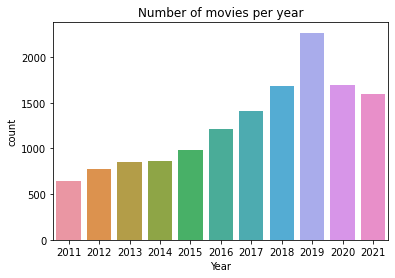

In [ ]:
sns.countplot(x='Year',data=df_latest)
plt.title('Number of movies per year')
plt.show()

From above graph we can say their is decrease in number of movies after 2019 i.e., Covid-19 has effected this industry 

Top Hindi Movies

In [ ]:
Top_50_hindi=df_India[df_India['language']=='Hindi'].sort_values('averageRating',ascending=False).head(50)
Top_5_hindi=Top_50_hindi[['Moviename','averageRating']].head(5)
Top_5_hindi

,Moviename,averageRating
14082,Miles of Love,10.0
11648,Rickshawala,9.7
14681,Jai Bhim,9.6
14588,Methagu,9.5
25806,Barun Rai and the House on the Cliff,9.5


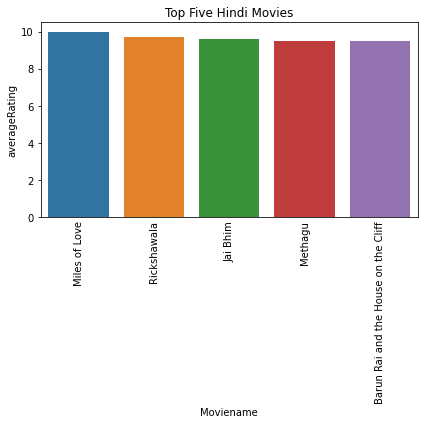

In [ ]:
fig,x=plt.subplots(figsize=(6,6))
sns.barplot(x = 'Moviename',
            y = 'averageRating',
            data = Top_5_hindi)
plt.title('Top Five Hindi Movies')
plt.setp(x.get_xticklabels(), rotation=90)
x.tick_params(labelsize=10)
x.tick_params(length=0, axis='x')
plt.tight_layout()
plt.show()

Top South Movies

In [ ]:
l=['Tamil','Telgu','Malayalam','Bengali','Kannada']
Top_50_south=df_India[df_India['language'].isin(l)].sort_values('averageRating',ascending=False).head(50)
Top_5_south=Top_50_south[['Moviename','averageRating']].head(5)
Top_5_south

,Moviename,averageRating
24831,Amudhan aka Sinamkol,9.4
10702,Soorarai Pottru,9.1
10705,Soorarai Pottru,9.1
14703,Paka (River of Blood),8.9
23838,Peranbu,8.9


Finding the percentage of each language movies

In [ ]:
df_India.language.value_counts()

English      16114
Hindi         8376
Tamil          512
Telgu          473
Malayalam      386
Bengali        140
Marathi         82
Kannada         74
Urdu            53
Gujarati        39
Punjabi          1
Name: language, dtype: int64

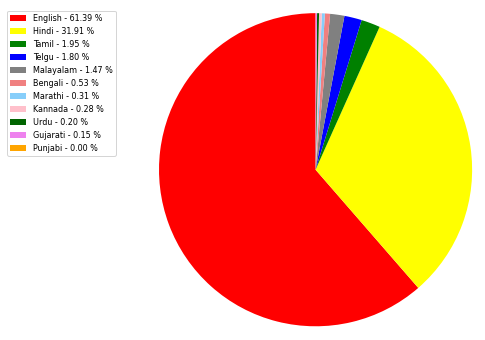

In [ ]:
x = np.char.array(['English','Hindi','Tamil','Telgu','Malayalam','Bengali','Marathi','Kannada','Urdu','Gujarati','Punjabi'])
y = np.array([16114,8376, 512, 473,386,140,82,74,53,39,1])
colors = ['red','yellow','green','blue','grey','lightcoral','lightskyblue','pink', 'darkgreen','violet','orange']
percent = 100.*y/y.sum()
plt.figure(figsize=(6,6))
patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y), key=lambda x: x[2],reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),fontsize=8)
plt.show()

In our dataset the percentage of english movies is highest

Highest rated movie for each language

In [ ]:
df_lang=df_India.groupby("language")
df_lang =df_lang.max().reset_index()
df_lang=df_lang[['language','Moviename','averageRating']].sort_values('averageRating',ascending=False)

In [ ]:
df_lang

,language,Moviename,averageRating
1,English,Ölmeyen ask,10.0
3,Hindi,Ôkami kodomo no Ame to Yuki,10.0
8,Tamil,Zeny v pokusení,9.4
9,Telgu,xXx,9.1
6,Marathi,Witness,9.0
10,Urdu,Witness,9.0
5,Malayalam,Yevadu,8.9
2,Gujarati,Witness,8.7
0,Bengali,Yuddha,8.6
4,Kannada,Yennai Arindhaal,8.6


Lowest rated movie for each language

In [ ]:
df_lang=df_India.groupby("language")
df_lang =df_lang.min().reset_index()
df_lang=df_lang[['language','Moviename','averageRating']].sort_values('averageRating',ascending=False).reset_index(drop=True)

In [ ]:
df_lang

,language,Moviename,averageRating
0,Marathi,A Paying Ghost,5.5
1,Gujarati,Batman,5.4
2,Punjabi,Ik Sandhu Hunda Si,5.1
3,Kannada,Ambi Ning Vysaitho,3.8
4,Urdu,Ada... A Way of Life,3.6
5,Bengali,80 te Asio Na,2.9
6,Malayalam,10 Kalpanakal,1.9
7,Telgu,1 - Nenokkadine,1.8
8,Tamil,13B: Fear Has a New Address,1.6
9,English,#Home,1.1


Different genres and total count of movies genre wise

In [ ]:
l=[]
for x in df_India['genres']:
   l.append(x.split(','))

In [ ]:
genrelist=[]
for x in l:
   for y in x:
      genrelist.append(y)

In [ ]:
uniquegenre=[]
for x in genrelist:
  if x not in uniquegenre:
     uniquegenre.append(x)
print("The number of unique genres is: %d" %len(uniquegenre))    

The number of unique genres is: 23


In [ ]:
from collections import Counter
d=Counter(genrelist)


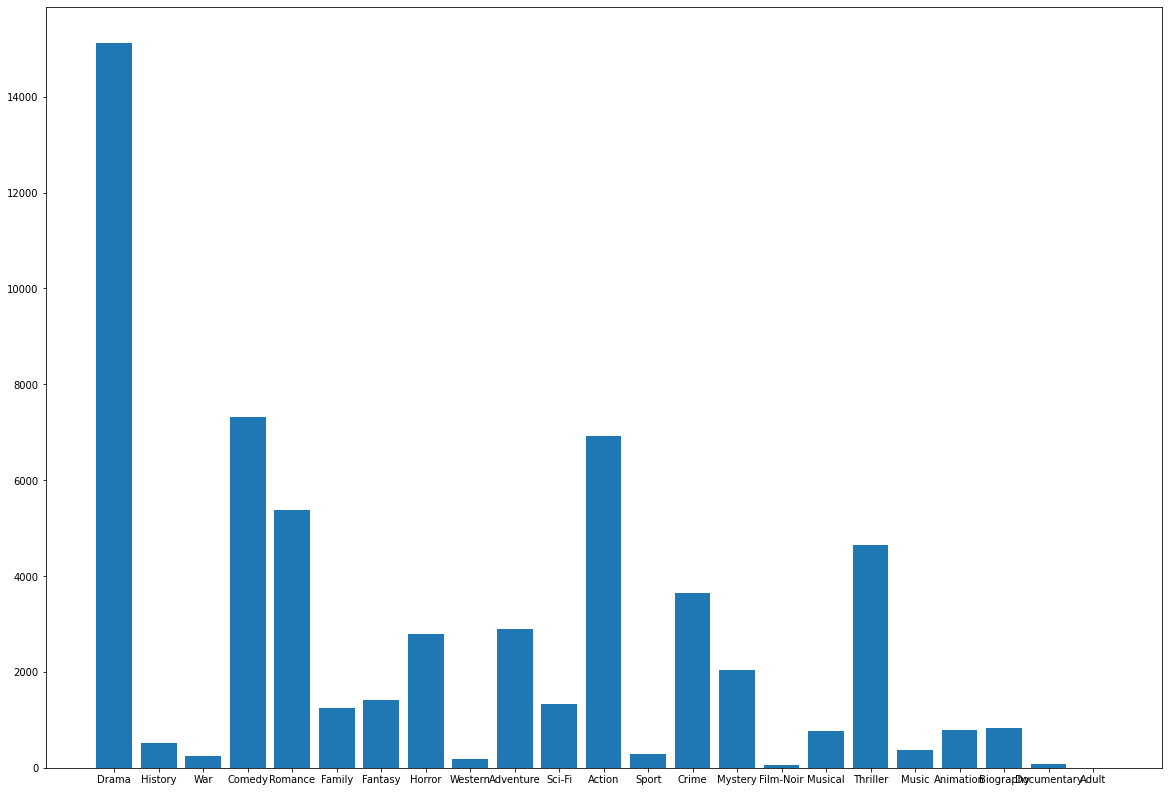

In [ ]:
fig,x=plt.subplots(figsize=(22,13))
plt.bar(d.keys(), d.values())
plt.show()

Drama Genre has most number of movies among all genres

Genre wise average rating from 2000 and plotting top 6 genre

In [ ]:
df_India_latest=df_India[df_India['Year']>=2000]
avgrating=[]
for x in uniquegenre:
      avgrating.append(df_India_latest[df_India_latest['genres'].str.contains(x)].averageRating.mean())

In [ ]:
genre_avgrating = pd.DataFrame(zip(uniquegenre,avgrating), columns =['Genre','AverageRating'])
genre_avgrating.sort_values('AverageRating',ascending=False,inplace=True)
genre_avgrating=genre_avgrating.head(6)

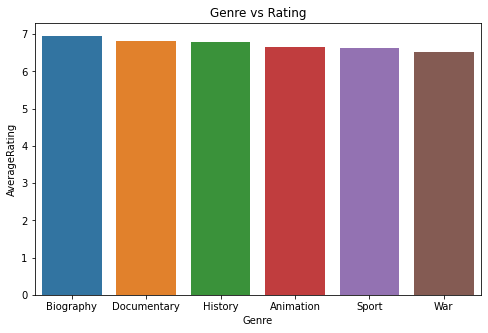

In [ ]:
fig,x=plt.subplots(figsize=(6,6))
sns.barplot(x = 'Genre',
            y = 'AverageRating',
            data = genre_avgrating)
plt.title('Genre vs Rating')
plt.show()

Movies in Biography Genre has the highest average rating

popularity of genre over time

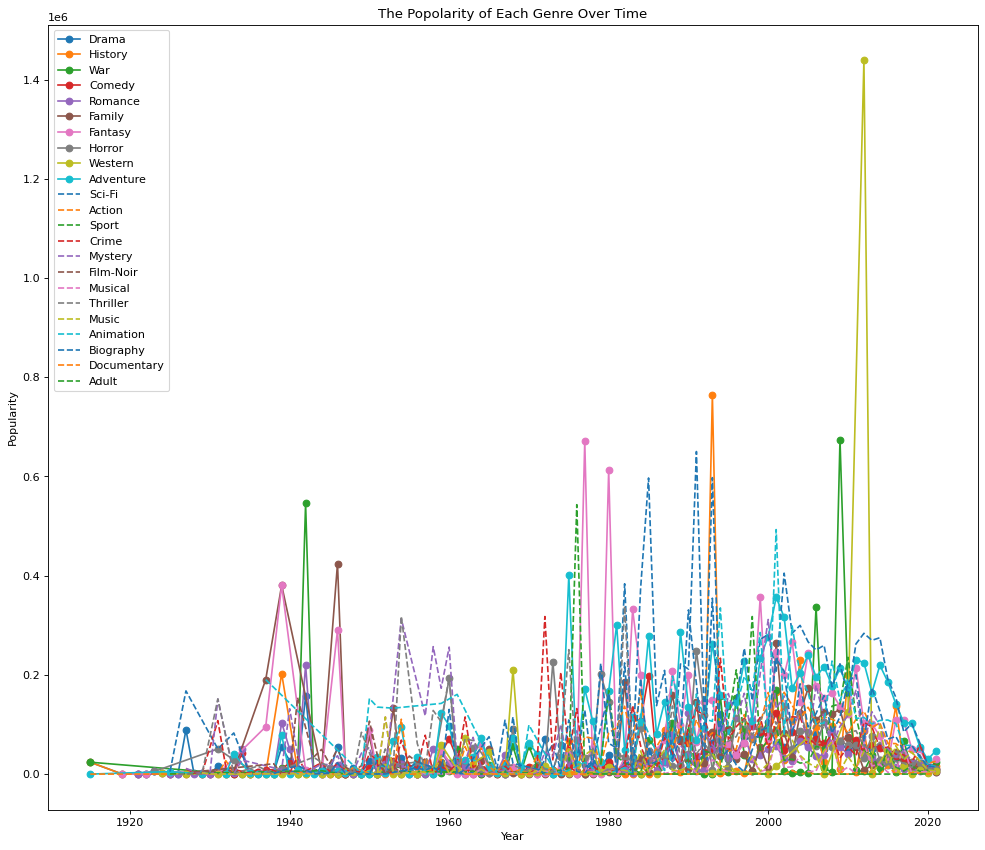

In [ ]:
genre = df_India['genres']
most_diff_min_max = 0
most_genre=""

plt.figure(figsize=(15, 13), dpi= 80, facecolor='w', edgecolor='k')
for i in range (len(uniquegenre)):
    A = df_India[genre.str.contains(uniquegenre[i])]
    a = A[['numVotes','Year']]
    p = a.groupby('Year').mean()
    p_mean = p['numVotes'].tolist()
    year = A['Year'].unique()
    year = np.sort(year)
    if i < 10:
        plt.plot(year, p_mean,'-o')
    else: 
        plt.plot(year, p_mean, '--')
    max = p.max()
    min = p.min()
    diff = float(max - min)
    if diff > most_diff_min_max:
        most_diff_min_max = diff
        most_genre = uniquegenre[i]
plt.legend(uniquegenre)
plt.title('The Popolarity of Each Genre Over Time')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

In [ ]:
most_genre

'Western'

The popularity of the Western genre has increased most over the years for India

Average runtime (in minutes) for each genre from 2000 and plotting top 6

In [ ]:
avgtime=[]
for x in uniquegenre:
      avgtime.append(df_India_latest[df_India_latest['genres'].str.contains(x)].runtimeMinutes.mean())

In [ ]:
genre_avgtime = pd.DataFrame(zip(uniquegenre,avgtime), columns =['Genre','averageTime'])
genre_avgtime.sort_values('averageTime',ascending=False,inplace=True)
genre_avgtime=genre_avgtime.head(6)

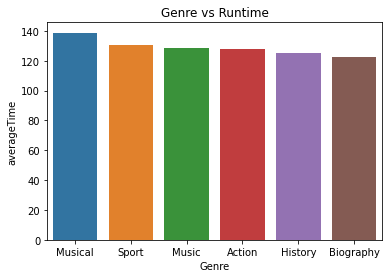

In [ ]:
sns.barplot(x = 'Genre',
            y = 'averageTime',
            data = genre_avgtime)
plt.title('Genre vs Runtime')
plt.show()

Movies of the Musical genre has the highest average runtime

Actors

actors and total count of movies

In [ ]:
l=[]
for x in df_India['Actors']:
   l.append(x.split(', '))

In [ ]:
actorlist=[]
for x in l:
   for y in x:
            actorlist.append(y)           

In [ ]:
uniqueactors=[]
for x in actorlist:
  if x not in uniqueactors:
     uniqueactors.append(x)
print("The number of actors is %d" %len(uniqueactors))    

The number of actors is 20984


In [ ]:
from collections import Counter
c=Counter(actorlist)

Top 6 actors with most number of movies

In [ ]:
c=c.most_common(6)
moviecount={}
for x in c:
    key=x[0]
    moviecount[key]=x[1]
moviecount


{'Akshay Kumar': 178,
 'Amitabh Bachchan': 191,
 'Kamal Haasan': 172,
 'Mithun Chakraborty': 147,
 'Mohanlal': 140,
 'Prakash Raj': 179}

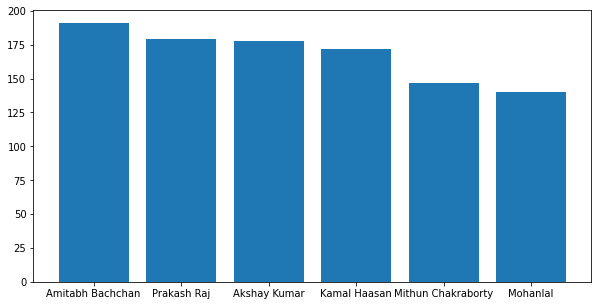

In [ ]:
fig,x=plt.subplots(figsize=(10,5))
plt.bar(*zip(*moviecount.items()))
plt.show()

Average rating for each actor

In [ ]:
avgrating=[]
for x in uniqueactors:
      avgrating.append(df_India[df_India['Actors'].str.contains(x)].averageRating.mean())

In [ ]:
actor_avgrating = pd.DataFrame(zip(uniqueactors,avgrating), columns =['Actors','AverageRating'])
actor_avgrating.sort_values('AverageRating',ascending=False,inplace=True)


In [ ]:
actor_avgrating.sort_values('AverageRating',ascending=False,inplace=True)
actor_avgrating.head(50)

,Actors,AverageRating
12552,Ravi Siva Teja,10.000000
12549,Ramya Pasupileti,10.000000
12551,Medishetti Abhinav,10.000000
10066,Avinash Dwivedi,9.700000
10669,Sunil Kare,9.600000
13096,Aarumugam,9.600000
10668,Bhagwan Kare,9.600000
10670,Ajay Shinde,9.600000
20664,George Dawson,9.500000
13023,Chandrasekar,9.500000


Director

Different directors and total count of movies

In [ ]:
l=df_India['Director']
directorlist=[]
for x in l:
   for y in (x.split(', ')):
            directorlist.append(y)

In [ ]:
uniquedirectors=[]
for x in directorlist:
  if x not in uniquedirectors:
     uniquedirectors.append(x)
print("The number of directors is:%d"%len(uniquedirectors))    

The number of directors are:11654


In [ ]:
from collections import Counter
c=Counter(directorlist)

Top 6 directors with most number of movies

In [ ]:
c=c.most_common(6)
moviecount={}
for x in c:
    key=x[0]
    moviecount[key]=x[1]
moviecount

{'David Dhawan': 51,
 'Mani Ratnam': 69,
 'Priyadarshan': 69,
 'Ram Gopal Varma': 56,
 'Steven Spielberg': 83,
 'Tim Burton': 70}

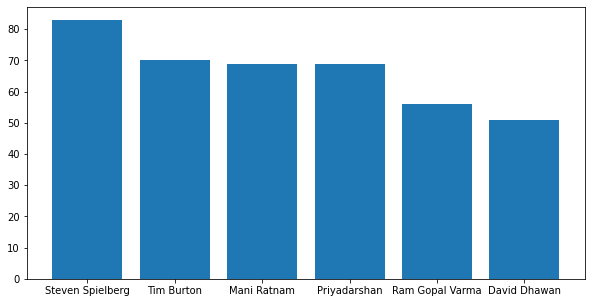

In [ ]:
fig,x=plt.subplots(figsize=(10,5))
plt.bar(*zip(*moviecount.items()))
plt.show()

Average rating for each director

In [ ]:
avgrating=[]
for x in uniquedirectors:
      avgrating.append(df_India[df_India['Director'].str.contains(x)].averageRating.mean())

In [ ]:
director_avgrating = pd.DataFrame(zip(uniquedirectors,avgrating), columns =['Directors','AverageRating'])
director_avgrating.sort_values('AverageRating',ascending=False,inplace=True)


In [ ]:
director_avgrating.sort_values('AverageRating',ascending=False,inplace=True)
director_avgrating.head(50)

,Directors,AverageRating
6362,Kayyam Upendra Kumar Nandhan,10.0
5325,Naveen Deshaboina,9.6
11437,Sam Bhattacharjee,9.5
6625,Kittu,9.5
6388,Revanth Korukonda,9.5
10975,Ranjith Joseph,9.4
5321,Hemanth Srinivas,9.4
6736,Prasun Chatterjee,9.4
6138,E. Sathi Babu,9.4
5768,Mathilde Damoisel,9.4


Actress

Different actress and total count of movies

In [ ]:
l=df_India['Actress']
actresslist=[]
for x in l:
   for y in (x.split(', ')):
           actresslist.append(y)

In [ ]:
uniqueactress=[]
for x in actresslist:
  if x not in uniqueactress:
     uniqueactress.append(x)
print("The number of actress is:%d"%len(uniqueactress))    

The number of actress is:15817


In [ ]:
from collections import Counter
c=Counter(actresslist)

Top 6 actress with most number of movies

In [ ]:
c=c.most_common(6)
moviecount={}
for x in c:
    key=x[0]
    moviecount[key]=x[1]
moviecount

{'Kajal Aggarwal': 95,
 'Kareena Kapoor': 84,
 'Nayanthara': 108,
 'Rani Mukerji': 84,
 'Rekha': 92,
 'Tabu': 92}

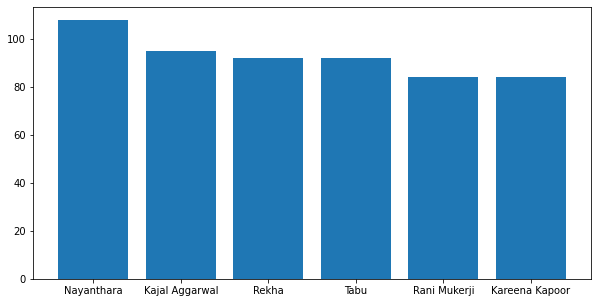

In [ ]:
fig,x=plt.subplots(figsize=(10,5))
plt.bar(*zip(*moviecount.items()))
plt.show()

Average rating for each actress

In [ ]:
avgrating=[]
for x in uniqueactress:
      avgrating.append(df_India[df_India['Actress'].str.contains(x)].averageRating.mean())

In [ ]:
actress_avgrating = pd.DataFrame(zip(uniqueactress,avgrating), columns =['Actress','AverageRating'])
actress_avgrating.sort_values('AverageRating',ascending=False,inplace=True)


In [ ]:
actress_avgrating.sort_values('AverageRating',ascending=False,inplace=True)
actress_avgrating.head(50)

,Actress,AverageRating
9264,Vismaya Sri,10.0
7379,Sangita Sinha,9.7
7380,Kasturi Chakraborty,9.7
7853,Radha Chavan,9.6
7854,Lata Kare,9.6
7855,Rekha Gaikwad,9.6
7845,Simer Motiani,9.4
14989,Leelawathy,9.4
14990,Mathumathi,9.4
9371,Sukanyeah Krishna,9.4


Converting ratings into four categories and finding count of each category



In [ ]:
def rating(rating):
  if rating >=7.5:
    return 'Excellent'
  elif rating >=6:
    return 'Good'  
  elif rating >=4:
    return 'Average' 
  else:
    return 'Flop'

In [ ]:
df_India['Rating']=df_India['averageRating'].apply(rating)

Finding the percentage of movie belonging to each rating category

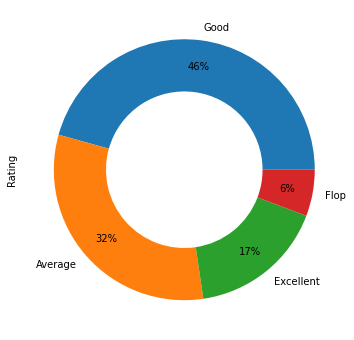

In [ ]:
df_India.Rating.value_counts().plot.pie(autopct="%.0f%%",figsize=(6,6),pctdistance=0.8,wedgeprops=dict(width=0.4))
plt.show()

Converting runtime into three categories

In [ ]:
def run_t(rtime):
  if rtime >=150:
    return 'Long'
  elif rtime >=90:
    return 'Medium'  
  else:
    return 'Short'

In [ ]:
df_India['type']=df_India['runtimeMinutes'].apply(run_t)

Finding the percentage of movie belonging to each runtime type

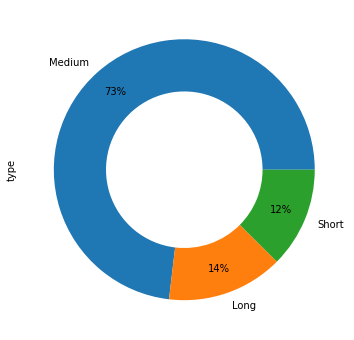

In [ ]:
df_India.type.value_counts().plot.pie(autopct="%.0f%%",figsize=(6,6),pctdistance=0.8,wedgeprops=dict(width=0.4))
plt.show()

Analysis of the whether type of movie affect rating or votes

In [ ]:
df_India.groupby('type').numVotes.mean()

type
Long      37091.674056
Medium    54571.990051
Short     19968.133885
Name: numVotes, dtype: float64

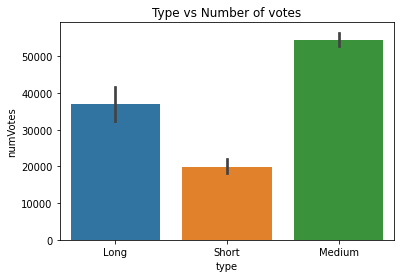

In [ ]:
sns.barplot(x = 'type',
            y = 'numVotes',
            data=df_India)
plt.title('Type vs Number of votes')
plt.show()

The movies with mediun runtime has highest average number of votes

In [ ]:
df_India.groupby('type').averageRating.mean()

type
Long      6.582528
Medium    6.271501
Short     5.519056
Name: averageRating, dtype: float64

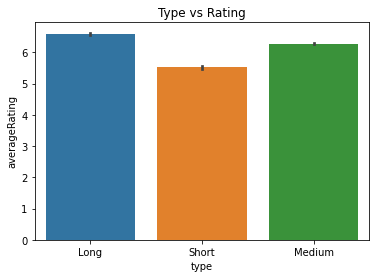

In [ ]:
sns.barplot(x = 'type',
            y = 'averageRating',
            data=df_India)
plt.title('Type vs Rating')
plt.show()

Movies with long runtime has the highest average Rating

Finding yearwise top100 movies from year 1980

In [ ]:
df_year=df_India[df_India['Year']>=1980]
df_year=df_year.groupby('Year').head(100)
df_year=df_year.sort_values('Year',ascending=False).reset_index(drop=True)

Average rating yearwise from 2009



In [ ]:
df_year=df_India[df_India['Year']>=2009]
df_year=(df_year.groupby(df_year['Year'],as_index=False).aggregate(np.mean).reindex(columns=df_year.columns))
df_year.sort_values('averageRating',ascending=False,inplace=True)
df_year=df_year[['Year','averageRating']].reset_index(drop=True)
df_year

,Year,averageRating
0,2014,6.185565
1,2015,6.161145
2,2021,6.159245
3,2011,6.145342
4,2012,6.139254
5,2013,6.136749
6,2009,6.108287
7,2010,6.106505
8,2017,6.104108
9,2018,6.103199


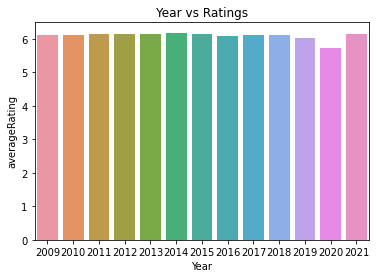

In [ ]:
sns.barplot(x = 'Year',
            y = 'averageRating',
            data = df_year)
plt.title('Year vs Ratings')
plt.show()

Average votes yearwise from 2009

In [ ]:
df_year=df_India[df_India['Year']>=2009]
df_year=(df_year.groupby(df_year['Year'],as_index=False).aggregate(np.mean).reindex(columns=df_year.columns))
df_year.sort_values('numVotes',ascending=False,inplace=True)
df_year=df_year[['Year','numVotes']].reset_index(drop=True)

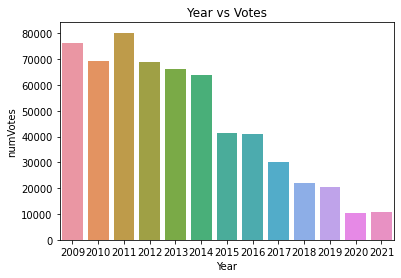

In [ ]:
sns.barplot(x = 'Year',
            y = 'numVotes',
            data = df_year)
plt.title('Year vs Votes')
plt.show()

The number of votes is decreasing over the years

Change in duration of movies over years

In [ ]:
grouped_year=df_India['runtimeMinutes'].groupby(df_India['Year']).describe()
avg_runtime_by_year=grouped_year['mean']
avg_runtime_min=grouped_year['mean']-grouped_year['std']
avg_runtime_max=grouped_year['mean']+grouped_year['std']

<function matplotlib.pyplot.show>

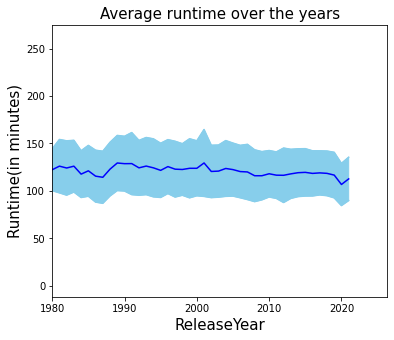

In [ ]:
fig,x=plt.subplots(figsize=(6,5))
x.plot(avg_runtime_by_year,color='blue')
x.plot(avg_runtime_min,color='skyblue')
x.plot(avg_runtime_max,color='skyblue')
x.fill_between(grouped_year.index,avg_runtime_min,avg_runtime_max,color='skyblue')
x.set_title('Average runtime over the years',fontsize=15)
x.set_xlabel('ReleaseYear',fontsize=15)
x.set_ylabel('Runtime(in minutes)',fontsize=15)
x.set_xlim(1980)
plt.show

Change in duration of movies over decade

In [ ]:
decade=df_India.copy()
decade['releaseYear']=((decade['Year']//10)*10).astype('int64')

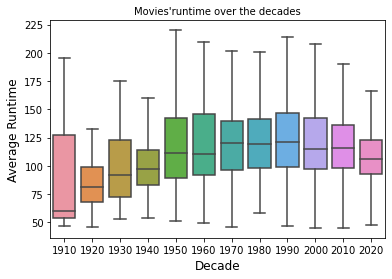

In [ ]:
sns.boxplot(x='releaseYear',y='runtimeMinutes',data=decade,showfliers=False)
plt.title('Movies\'runtime over the decades',fontsize=10)
plt.xlabel('Decade',fontsize=12)
plt.ylabel('Average Runtime',fontsize=12)
plt.show()

Average runtime has not changed much over the time